# Steady Temperature Time Series 

We worked through similar examples in the Active Learning Session. 

## Follow the same approaches to read in the data from 6TMP0015_25C.CSV

This data came from six sensors sitting at steady state in my office, so it should just be a lot of measurements all at the same temperature. However, a quick look at the data makes it clear that each sensor has a different mean and there's quite a bit of noise on the signals as well.

We'll plot some of the data to get a better picture of what you are looking at, then answer the following questions:

In [1]:
# gets all of numpy but you will still need to refer to e.g. numpy.random.randn() as random.randn()
from numpy import *               # all of the array capable elements for numerical data          
from scipy.stats import norm      # comprehensive functions for Gaussian normal distributions
import csv                        # library for reading and writing comma separated value files
from matplotlib.pyplot import *   # all of pyplot to graph the results of our calculations

# put figures inline in the notebook, so you don't have to call show()
%matplotlib inline

# This lets you make the default figure size larger (or smaller)
from IPython.core.pylabtools import figsize
figsize(14, 7)

with open('6TMP0015_25C.CSV') as csvfile:
    dataRead = csv.reader(csvfile)
    a = np.asarray([data for data in dataRead])
print(np.array_str(a[0:5],max_line_width = 100))


[['seconds' ' T0' ' T1' ' T2' ' T3' ' T4' ' T5' ' BAT' ' ']
 ['4.534' ' 24.854' ' 26.605' ' 25.571' ' 25.889' ' 25.809' ' 25.013' ' 4.1747' ' ']
 ['4.558' ' 24.775' ' 26.526' ' 25.730' ' 25.809' ' 25.571' ' 24.854' ' 4.1779' ' ']
 ['4.570' ' 25.332' ' 26.366' ' 25.650' ' 25.889' ' 25.650' ' 24.934' ' 4.1747' ' ']
 ['4.578' ' 25.093' ' 26.526' ' 25.889' ' 25.889' ' 25.491' ' 25.173' ' 4.1763' ' ']]


In [2]:
print(np.shape(a))
t = np.asfarray(a[1:,0]) 
labs = a[0,0:]
d = np.asfarray(a[1:,1:len(a[1])-2])   # cut off the blank and the baterry data
print(labs)
print(d[0:5])     # show the first 5 lines
print(d[0:5,2])   # slice out column 2, the third one over

(40355, 9)
['seconds' ' T0' ' T1' ' T2' ' T3' ' T4' ' T5' ' BAT' ' ']
[[ 24.854  26.605  25.571  25.889  25.809  25.013]
 [ 24.775  26.526  25.73   25.809  25.571  24.854]
 [ 25.332  26.366  25.65   25.889  25.65   24.934]
 [ 25.093  26.526  25.889  25.889  25.491  25.173]
 [ 25.252  26.207  25.889  26.128  25.809  25.093]]
[ 25.571  25.73   25.65   25.889  25.889]


There are 40354 lines of 6 columns each,so this may take a while
Just imagine trying it in a spreadsheet...


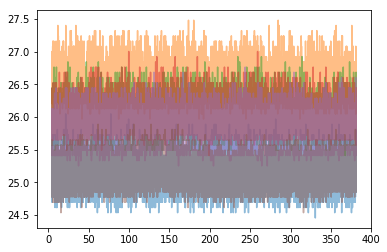

In [4]:
(samp,cols) = np.shape(d)
print("There are %d lines of %d columns each,so this may take a while"%(samp, cols))
print("Just imagine trying it in a spreadsheet...")
plot(t,d,alpha=0.5)


## Means, Standard Deviations and Uncertainties
What are the means and standard deviations for each of the six sensors over the sampling time? Are they each showing the same sort of behaviour except for different temperature offsets? Estimate the amount of uncertainty in a temperature measurement that would come from selecting a TMP 36 at random. (How much scatter is there in the means?) Estimate the uncertainty in a single temperature measurement that would come from electrical noise. (How much scatter is there in the measurements from a single sensor?) How would you proceed if you wanted to get better measurements from one of these sensors?

In [5]:
means = np.zeros(6)
stds = means.copy()
for i in range(0,6): 
    means[i] = np.mean(d[:,i])
    stds[i] = np.std(d[:,i],ddof=1)
print('Means for each Transducer', np.array_str(means,precision = 2))
print('Standard Deviations for each Transducer',np.array_str(stds,precision = 2))
print('Standard Deviation of the sample of Means', np.std(means,ddof=1))
(samp,cols) = np.shape(d)
print(samp, cols)

Means for each Transducer [ 25.1   26.48  25.94  26.    25.78  25.13]
Standard Deviations for each Transducer [ 0.16  0.15  0.15  0.14  0.15  0.14]
Standard Deviation of the sample of Means 0.537716967582
40354 6
